In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import pyqtgraph as pg
import xfl_dp

In [4]:
runno="0293"
cno="00"
ending="cxi"
basepath="/gpfs/cfel/cxi/scratch/user/murrayke/Processed_Data/XFEL/2019_MID/CXI/"
fnam="r{0}-data/XFEL-r{0}-c{1}.{2}".format(runno,cno,ending)
f_test=h5.File(os.path.join(basepath,fnam),"r")

OSError: Unable to open file (unable to open file: name = '/gpfs/cfel/cxi/scratch/user/murrayke/Processed_Data/XFEL/2019_MID/CXI/r0293-data/XFEL-r0293-c00.cxi', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
!h5ls -r /gpfs/cfel/cxi/scratch/user/murrayke/Processed_Data/XFEL/2019_MID/CXI/r0293-data/XFEL-r0293-c00.cxi

/                        Group
/EuXFEL                  Soft Link {instrument}
/entry_1                 Group
/entry_1/data_1          Soft Link {/entry_1/instrument_1/detector_1}
/entry_1/experiment_identifier Dataset {9998/Inf}
/entry_1/instrument_1    Group
/entry_1/instrument_1/detector_1 Group
/entry_1/instrument_1/detector_1/data Soft Link {/entry_1/instrument_1/detector_1/detector_and_photon_corrected/data}
/entry_1/instrument_1/detector_1/description Dataset {SCALAR}
/entry_1/instrument_1/detector_1/detector_and_photon_corrected Group
/entry_1/instrument_1/detector_1/detector_and_photon_corrected/data Dataset {9998/Inf, 8192, 128}
/entry_1/instrument_1/detector_1/detector_and_photon_corrected/experiment_identifier Soft Link {/entry_1/experiment_identifier}
/entry_1/instrument_1/detector_1/detector_and_photon_corrected/mask Dataset {9998/Inf, 8192, 128}
/entry_1/instrument_1/detector_1/detector_and_photon_corrected/mask_shared Dataset {8192, 128}
/entry_1/instrument_1/detector_1

In [3]:
pg.show(f_test["entry_1/instrument_1/detector_1/detector_and_photon_corrected/data"][()])

/gpfs/cfel/cxi/common/public/cfelsoft-rh7-public/conda_stack/anaconda_2018.12/envs/cfel_mll/lib/python3.7/site-packages/pyqtgraph/imageview/ImageView.py:588: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[sl]


# Filter only frames that contain data

In [4]:
tres=100
data_raw=f_test["entry_1/instrument_1/detector_1/detector_and_photon_corrected/data"][()]
is_tres=np.zeros((data_raw.shape[0])).astype(np.bool)
for i in range(0,is_tres.shape[0]):
    is_tres[i]=(np.amax(data_raw[i,:,:])>tres) 
print(is_tres)

[False  True False ... False False False]


In [5]:
Tids=f_test["/instrument/trainID"][(is_tres)].astype(np.int)
Pids=f_test["/instrument/pulseID"][(is_tres)].astype(np.int)
#np.savetxt("/gpfs/cfel/cxi/scratch/user/murrayke/Processed_Data/XFEL/2019_MID/export_293.txt",(is_tres,Tids,Pids))

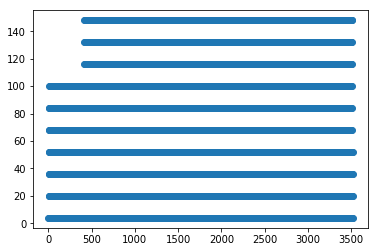

In [6]:
#Testing of the Tids,Pids
plt.scatter(np.arange(0,Tids.shape[0]),Pids)

In [6]:
#Look which train has the most Pulses. This script assumes that the train with most pulses contains all pulseIDs of other trains.

TIDs_contained=[]
for i in range(0,Tids.shape[0],1):
    if Tids[i] not in TIDs_contained:
        TIDs_contained.append(Tids[i])
no_of_pulses=np.zeros((len(TIDs_contained)))
#for i in Tids:
max_pulses=0
current_pulses=[]
for i1 in range(0,Tids.shape[0]):
    for i2 in range(0,len(TIDs_contained)):
        if TIDs_contained[i2]==Tids[i1]:
            no_of_pulses[i2]+=1

i_max_train=int(np.cumsum(no_of_pulses[:np.argmax(no_of_pulses)])[-1])
N_max_train=int(np.amax(no_of_pulses))
print(i_max_train,N_max_train)
pulsnos=np.zeros((N_max_train))
i2=int(0)
for i1 in range(0,Tids.shape[0]):
    if int(Tids[i1])==int(Tids[i_max_train]):
        pulsnos[i2]=Pids[i1]
        #print(Tids[i1]),int(Tids[i_max_train])
        #print(pulsnos[i2],"Found")
        i2+=1


406 10


In [82]:
#data=data_raw[is_tres,:,:]
start_image=0
end_image=4
data=[]
print((len(TIDs_contained),N_max_train,data_raw.shape[0],data_raw.shape[1]))
i1=0
index_buckets=np.zeros((len(TIDs_contained))).astype(np.int)
i2=0
#shape of data_resort: data[trains,pulses,image1,image2]
data_resort=np.zeros((len(TIDs_contained),N_max_train,data_raw.shape[1],data_raw.shape[2]))
for i_tot in range(0,Tids.shape[0],1):
    current_train=Tids[i_tot]
    current_pulse=Pids[i_tot]
    for i in range(0, len(TIDs_contained)):
        if TIDs_contained[i]==current_train:
            i1=i
    if current_pulse in pulsnos:
        print(i1,index_buckets[i1])
        data_resort[i1,index_buckets[i1],:,:]=data_raw[is_tres,:,:][i_tot,:,:]
        index_buckets[i1]+=1

data_resort=np.mean(data_resort,axis=0)
print(data_resort.shape)
np.save("f293_data_resort.npy",data_resort)

(370, 10, 9998, 8192)
0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
7 0
7 1
7 2
7 3
7 4
7 5
7 6
8 0
8 1
8 2
8 3
8 4
8 5
8 6
9 0
9 1
9 2
9 3
9 4
9 5
9 6
10 0
10 1
10 2
10 3
10 4
10 5
10 6
11 0
11 1
11 2
11 3
11 4
11 5
11 6
12 0
12 1
12 2
12 3
12 4
12 5
12 6
13 0
13 1
13 2
13 3
13 4
13 5
13 6
14 0
14 1
14 2
14 3
14 4
14 5
14 6
15 0
15 1
15 2
15 3
15 4
15 5
15 6
16 0
16 1
16 2
16 3
16 4
16 5
16 6
17 0
17 1
17 2
17 3
17 4
17 5
17 6
18 0
18 1
18 2
18 3
18 4
18 5
18 6
19 0
19 1
19 2
19 3
19 4
19 5
19 6
20 0
20 1
20 2
20 3
20 4
20 5
20 6
21 0
21 1
21 2
21 3
21 4
21 5
21 6
22 0
22 1
22 2
22 3
22 4
22 5
22 6
23 0
23 1
23 2
23 3
23 4
23 5
23 6
24 0
24 1
24 2
24 3
24 4
24 5
24 6
25 0
25 1
25 2
25 3
25 4
25 5
25 6
26 0
26 1
26 2
26 3
26 4
26 5
26 6
27 0
27 1
27 2
27 3
27 4
27 5
27 6
28 0
28 1
28 2
28 3
28 4
28 5
28 6
29 0
29 1
29 2
29 3
29 4
29 5
29 

168 6
168 7
168 8
168 9
169 0
169 1
169 2
169 3
169 4
169 5
169 6
169 7
169 8
169 9
170 0
170 1
170 2
170 3
170 4
170 5
170 6
170 7
170 8
170 9
171 0
171 1
171 2
171 3
171 4
171 5
171 6
171 7
171 8
171 9
172 0
172 1
172 2
172 3
172 4
172 5
172 6
172 7
172 8
172 9
173 0
173 1
173 2
173 3
173 4
173 5
173 6
173 7
173 8
173 9
174 0
174 1
174 2
174 3
174 4
174 5
174 6
174 7
174 8
174 9
175 0
175 1
175 2
175 3
175 4
175 5
175 6
175 7
175 8
175 9
176 0
176 1
176 2
176 3
176 4
176 5
176 6
176 7
176 8
176 9
177 0
177 1
177 2
177 3
177 4
177 5
177 6
177 7
177 8
177 9
178 0
178 1
178 2
178 3
178 4
178 5
178 6
178 7
178 8
178 9
179 0
179 1
179 2
179 3
179 4
179 5
179 6
179 7
179 8
179 9
180 0
180 1
180 2
180 3
180 4
180 5
180 6
180 7
180 8
180 9
181 0
181 1
181 2
181 3
181 4
181 5
181 6
181 7
181 8
181 9
182 0
182 1
182 2
182 3
182 4
182 5
182 6
182 7
182 8
182 9
183 0
183 1
183 2
183 3
183 4
183 5
183 6
183 7
183 8
183 9
184 0
184 1
184 2
184 3
184 4
184 5
184 6
184 7
184 8
184 9
185 0
185 1
185 

305 2
305 3
305 4
305 5
305 6
305 7
305 8
305 9
306 0
306 1
306 2
306 3
306 4
306 5
306 6
306 7
306 8
306 9
307 0
307 1
307 2
307 3
307 4
307 5
307 6
307 7
307 8
307 9
308 0
308 1
308 2
308 3
308 4
308 5
308 6
308 7
308 8
308 9
309 0
309 1
309 2
309 3
309 4
309 5
309 6
309 7
309 8
309 9
310 0
310 1
310 2
310 3
310 4
310 5
310 6
310 7
310 8
310 9
311 0
311 1
311 2
311 3
311 4
311 5
311 6
311 7
311 8
311 9
312 0
312 1
312 2
312 3
312 4
312 5
312 6
312 7
312 8
312 9
313 0
313 1
313 2
313 3
313 4
313 5
313 6
313 7
313 8
313 9
314 0
314 1
314 2
314 3
314 4
314 5
314 6
314 7
314 8
314 9
315 0
315 1
315 2
315 3
315 4
315 5
315 6
315 7
315 8
315 9
316 0
316 1
316 2
316 3
316 4
316 5
316 6
316 7
316 8
316 9
317 0
317 1
317 2
317 3
317 4
317 5
317 6
317 7
317 8
317 9
318 0
318 1
318 2
318 3
318 4
318 5
318 6
318 7
318 8
318 9
319 0
319 1
319 2
319 3
319 4
319 5
319 6
319 7
319 8
319 9
320 0
320 1
320 2
320 3
320 4
320 5
320 6
320 7
320 8
320 9
321 0
321 1
321 2
321 3
321 4
321 5
321 6
321 7
321 

In [27]:
pg.show(data_resort)


# Divide Panel pixels

In [40]:
offset_x=0
offset_y=0
pwidthx=64
pwidthy=64
data_resort=np.load("f293_data_resort.npy")
mask=np.zeros_like(data_resort).astype(np.bool)
for i0 in range(0, data_resort.shape[0],1):
    for i1 in range(offset_y,data_resort.shape[1],pwidthy):
        mask[i0,i1,:]=np.ones((mask.shape[2]))
    #for i1 in range(offset_y+1,data_resort.shape[1],pwidthy):
    #    mask[i0,i1,:]=np.ones((mask.shape[2]))
    for i1 in range(offset_y-1,data_resort.shape[1],pwidthy):
        mask[i0,i1,:]=np.ones((mask.shape[2]))
    for i2 in range(offset_x,data_resort.shape[2],pwidthx):
        mask[i0,:,i2]=np.ones((mask.shape[1]))
    #for i2 in range(offset_x+1,data_resort.shape[2],pwidthx):
    #    mask[i0,:,i2]=np.ones((mask.shape[1]))
    for i2 in range(offset_x-1,data_resort.shape[2],pwidthx):
        mask[i0,:,i2]=np.ones((mask.shape[1]))
data_resort[mask]=data_resort[mask]/2
pg.show(data_resort)

# normalize by the background_counts


In [41]:
#Get the roi
plt.imshow(data_resort[0,:,:])

In [42]:
roi_bg=(0,5000,0,-1) #ss,fs
bg_int=np.zeros((data_resort.shape[0]))
for i in range (0,bg_int.shape[0]):
    bg_int[i]=np.sum(data_resort[i,roi_bg[0]:roi_bg[1],roi_bg[2]:roi_bg[3]])
plt.plot(bg_int)

In [43]:
data_div=np.zeros_like(data_resort).astype(np.float)
for i in range (0,data_resort.shape[0],1):
    data_div[i,:,:]=np.divide(data_resort[i,:,:],bg_int[i])

In [44]:
pg.show(data_div)

In [45]:
plt.imshow(data_div[1,5750:8200,:],vmax=1)

# Fix geometry

In [46]:
from cfelpyutils.crystfel_utils import load_crystfel_geometry
from cfelpyutils.geometry_utils import apply_geometry_to_data       
ge=load_crystfel_geometry("/home/vmariani/Workspaces-refactored/crystallography/karabo/agipd.geom")
data_geom=np.zeros((data_div.shape[0],apply_geometry_to_data(data_div[0,:,:],ge).shape[0],apply_geometry_to_data(data_div[0,:,:],ge).shape[1]))
for i in range(0,data_div.shape[0]):
    data_geom[i,:,:]=apply_geometry_to_data(data_div[i,:,:],ge)
print(data_geom.shape)

(10, 1290, 1226)


In [47]:
pg.show(data_geom)

In [51]:
plt.imshow(data_geom[0,700:1100,700:1100],vmax=0.8)

In [55]:
for i in range(0,data_div.shape[0],1):
    plt.title("Frame{0}".format(i))
    plt.imshow(data_geom[i,700:1100,700:1100],vmax=0.8)
    plt.savefig("/gpfs/cfel/cxi/scratch/user/murrayke/Processed_Data/XFEL/2019_MID/img_{}.png".format(i),dpi=300)
    plt.close()
#6750 8200